In [4]:
!pip install sktime


In [5]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv('https://raw.githubusercontent.com/icarocamelo/inf-6333-applied-ai/main/dataset/node1.csv', header=None, parse_dates=True)
data.columns = ['Timestamp', 'Formatted Timestamp', 'Busy System', 'Busy User', 'Busy Iowait', 'Busy IRQs', 'Busy Other', 'Idle']
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))
data.head()

Number of instances = 672
Number of attributes = 8


,Timestamp,Formatted Timestamp,Busy System,Busy User,Busy Iowait,Busy IRQs,Busy Other,Idle
0,1646410320,2022-03-04 16:12,22.7,354.0,1.28,10.0,1.2200,477.0
1,1646410560,2022-03-04 16:16,31.1,919.0,1.12,13.7,0.1040,250.0
2,1646410800,2022-03-04 16:20,34.7,592.0,2.14,15.8,0.0851,750.0
3,1646411040,2022-03-04 16:24,33.1,830.0,1.69,25.0,0.1000,428.0
4,1646411280,2022-03-04 16:28,43.4,70.3,3.16,17.6,0.1110,1460.0


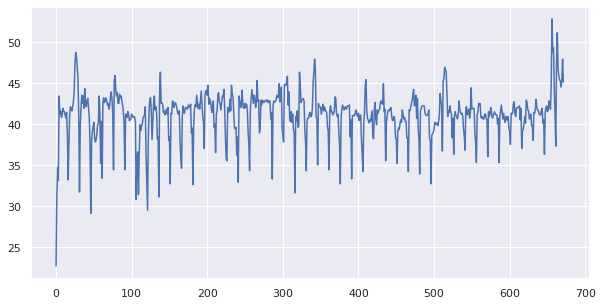

In [6]:
%matplotlib inline
sns.set(rc={'figure.figsize':(10, 5)})
data['Busy System'].plot()

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb6355f23d0>)

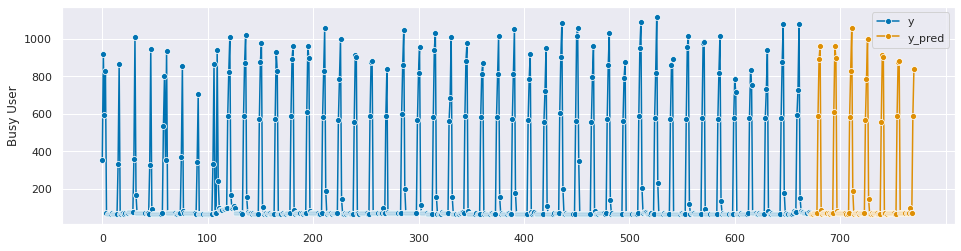

In [29]:
from sktime.utils.plotting import plot_series

# step 1: data specification
y = data['Busy User']

# plotting for visualization
# plot_series(y)

# step 2: specifying forecasting horizon
fh = np.arange(1, 100)

# step 3: specifying the forecasting algorithm
forecaster = NaiveForecaster(strategy="last", sp=500)

# step 4: fitting the forecaster
forecaster.fit(y)

# step 5: querying predictions
y_pred = forecaster.predict(fh)

# optional: plotting predictions and past data
plot_series(y, y_pred, labels=["y", "y_pred"])